##### A project to analyse twitter data on the airline travel satisfaction. 
Used a Random Forest Classifier to predict confidence level on the sentiment of the tweets (positive, negative or neutral)

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
airline_tweets = pd.read_csv("Tweets.csv")

airline_tweets.head()
airline_tweets.shape

(14640, 15)

6.0
4.0


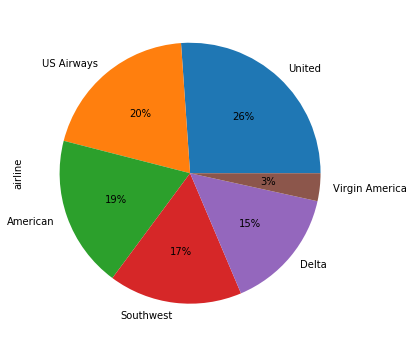

In [3]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

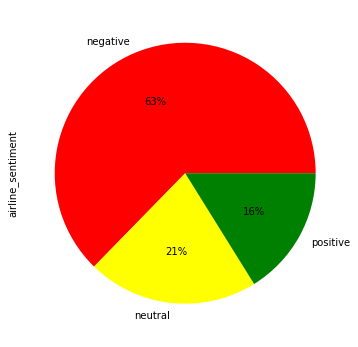

In [4]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

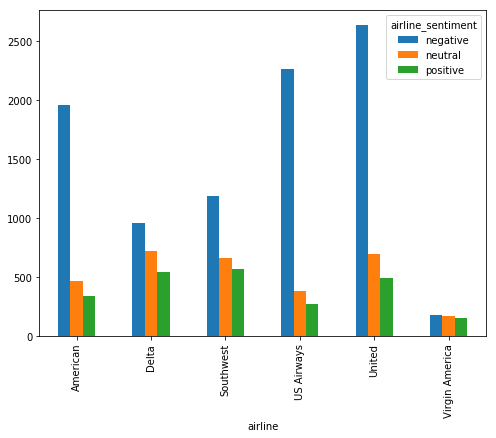

In [5]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

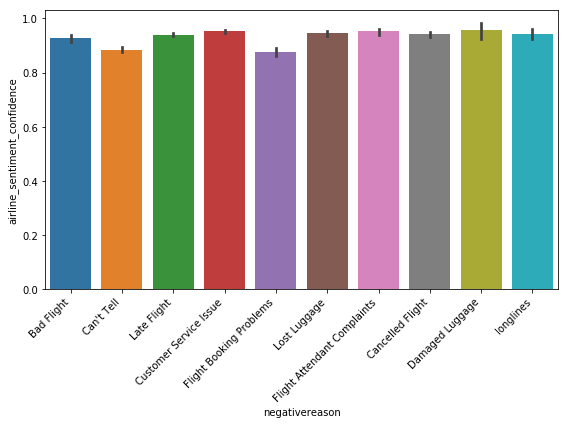

In [6]:
import seaborn as sns

ax=sns.barplot(x='negativereason', y='airline_sentiment_confidence' , data=airline_tweets)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [7]:
airline_tweets=shuffle(airline_tweets)

features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values


In [8]:
# Data Cleaning

processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()
    
    #print(processed_feature)

    processed_features.append(processed_feature)
    

In [9]:
#Get a bag of words
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features)


In [10]:
#Splitting TRaining and Testing Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [11]:
#Fitting the classifier to the training set
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
#Prediction on the test set
predictions = text_classifier.predict(X_test)

In [13]:
#Perfornmance Indicators

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1713   84   35]
 [ 319  243   60]
 [ 147   61  266]]
              precision    recall  f1-score   support

    negative       0.79      0.94      0.85      1832
     neutral       0.63      0.39      0.48       622
    positive       0.74      0.56      0.64       474

   micro avg       0.76      0.76      0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.74      0.76      0.74      2928

0.7588797814207651
